In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tf-roberta/config-roberta-base.json
/kaggle/input/tf-roberta/merges-roberta-base.txt
/kaggle/input/tf-roberta/vocab-roberta-base.json
/kaggle/input/tf-roberta/pretrained-roberta-base.h5
/kaggle/input/tweet-sentiment-extraction/test.csv
/kaggle/input/tweet-sentiment-extraction/sample_submission.csv
/kaggle/input/tweet-sentiment-extraction/train.csv


In [2]:
training_set=pd.read_csv("/kaggle/input/tweet-sentiment-extraction/train.csv")
test_set=pd.read_csv("/kaggle/input/tweet-sentiment-extraction/test.csv")

In [3]:
training_set.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
test_set.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [5]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [7]:
training_set.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [8]:
test_set.isnull().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [9]:
training_set.drop(["textID"],axis=1,inplace=True)
training_set.dropna(axis=0,how="any",inplace=True)

In [10]:
test_set.drop(["textID"],axis=1,inplace=True)

In [11]:
training_set.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training_set')

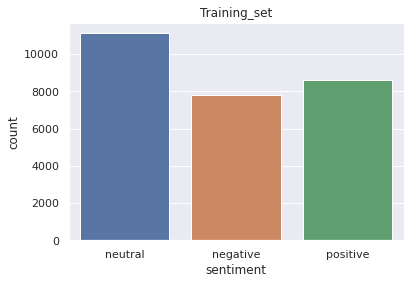

In [13]:
sns.set(style="darkgrid")
sns.countplot(x=training_set["sentiment"])
plt.title("Training_set")

Text(0.5, 1.0, 'Test_set')

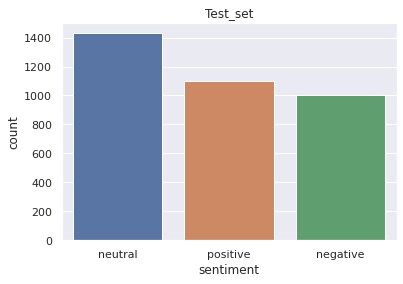

In [14]:
sns.set(style="darkgrid")
sns.countplot(x=test_set["sentiment"])
plt.title("Test_set")

In [15]:
import re
def clean_text(text):
    text=text.lower()
    text=re.sub("\n"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text=text.split()
    text=" ".join(text)
    return text

In [16]:
training_set["text"]=training_set["text"].apply(str).apply(lambda x:clean_text(x))
test_set["text"]=test_set["text"].apply(str).apply(lambda x:clean_text(x))

In [17]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)

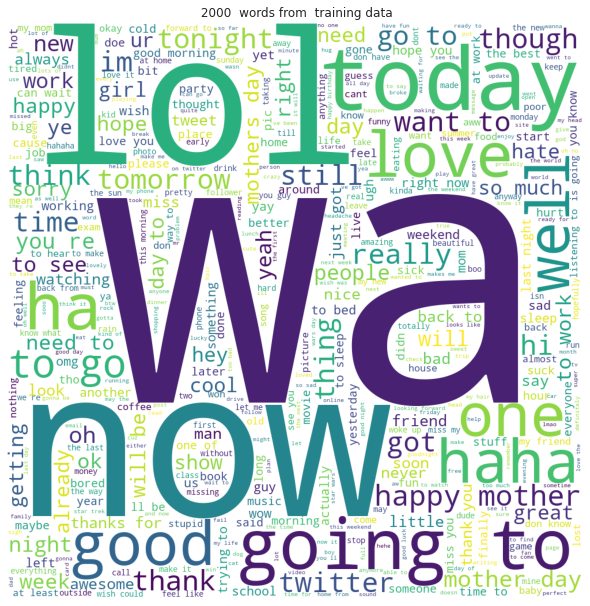

In [18]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords,max_words=2000, 
                min_font_size = 10).generate(" ".join(training_set["text"]))
  
# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title(" 2000  words from  training data")
plt.show()


In [19]:
positive=training_set[training_set["sentiment"]=="positive"]
neutral=training_set[training_set["sentiment"]=="neutral"]
negative=training_set[training_set["sentiment"]=="negative"]


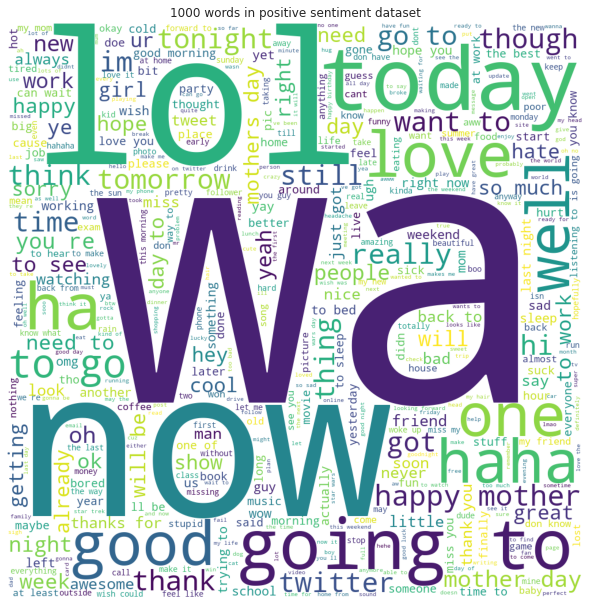

In [20]:
wordcloud_positive = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords,max_words=1000, 
                min_font_size = 10).generate(" ".join(positive["text"]))
  
# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title("1000 words in positive sentiment dataset")
plt.show()


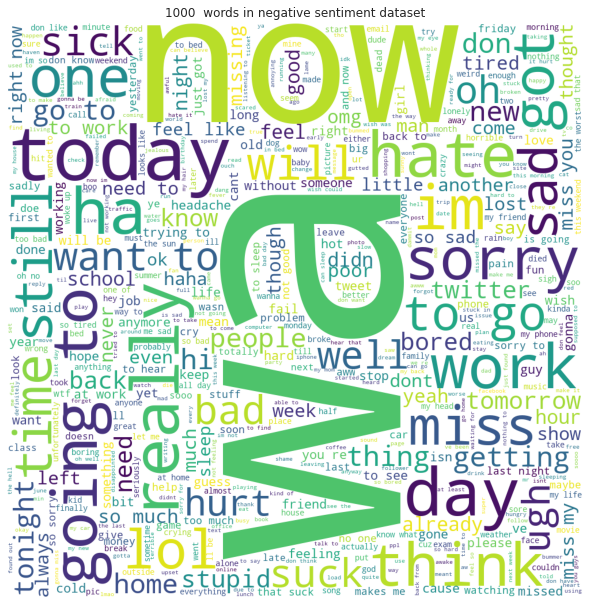

In [21]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords,max_words=1000, 
                min_font_size = 10).generate(" ".join(negative["text"]))
  
# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title("1000  words in negative sentiment dataset")
plt.show()


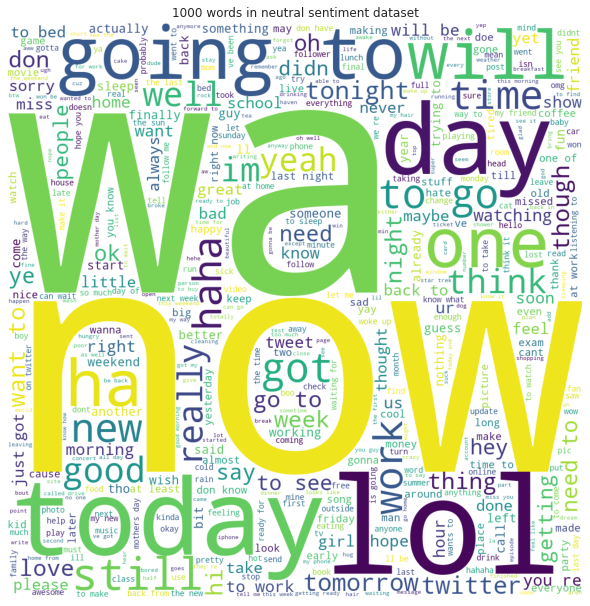

In [22]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords,max_words=1000, 
                min_font_size = 10).generate(" ".join(neutral["text"]))
  
# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title("1000 words in neutral sentiment dataset")
plt.show()


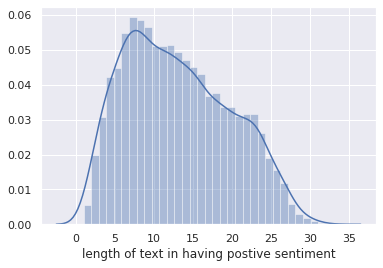

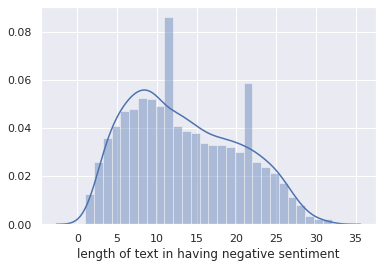

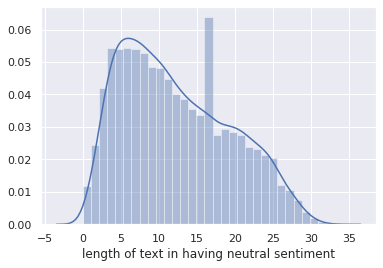

In [23]:
sns.distplot(positive["text"].str.split().str.len(),axlabel="length of text in having postive sentiment")
plt.show()
sns.distplot(negative["text"].str.split().str.len(),axlabel="length of text in having negative sentiment")
plt.show()
sns.distplot(neutral["text"].str.split().str.len(),axlabel="length of text in having neutral sentiment")
plt.show()

In [24]:
training_set["selected_text"]=training_set["selected_text"].apply(str).apply(lambda x:clean_text(x))

In [25]:
training_set.head()

,text,selected_text,sentiment
0,"i`d have responded, if i were going","i`d have responded, if i were going",neutral
1,sooo sad i will miss you here in san diego!!!,sooo sad,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"sons of ****, why couldn`t they put them on th...","sons of ****,",negative


In [26]:
import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.model_selection import StratifiedKFold
from transformers import *
import tokenizers

Special Thanks to Chris Deotte for sharing his TensorFlow roBERTa..

In [27]:
MAX_LEN = 96
PATH = '../input/tf-roberta/'
tokenizer = tokenizers.ByteLevelBPETokenizer(
    vocab_file=PATH+'vocab-roberta-base.json', 
    merges_file=PATH+'merges-roberta-base.txt', 
    lowercase=True,
    add_prefix_space=True
)

In [28]:
sentiment_id = {'positive': 1313, 'negative': 2430, 'neutral': 7974}
ct = training_set.shape[0]
input_ids = np.ones((ct,MAX_LEN),dtype='int32')
attention_mask = np.zeros((ct,MAX_LEN),dtype='int32')
token_type_ids = np.zeros((ct,MAX_LEN),dtype='int32')
start_tokens = np.zeros((ct,MAX_LEN),dtype='int32')
end_tokens = np.zeros((ct,MAX_LEN),dtype='int32')


In [29]:
for k in range(training_set.shape[0]):
    
    # FIND OVERLAP
    text1 = " "+" ".join(training_set.iloc[k,0].split())
    text2 = " ".join(training_set.iloc[k,1].split())
    idx = text1.find(text2)
    chars = np.zeros((len(text1)))
    chars[idx:idx+len(text2)]=1
    if text1[idx-1]==' ': chars[idx-1] = 1 
    enc = tokenizer.encode(text1) 
        
    # ID_OFFSETS
    offsets = []; idx=0
    for t in enc.ids:
        w = tokenizer.decode([t])
        offsets.append((idx,idx+len(w)))
        idx += len(w)
    toks = []
    for i,(a,b) in enumerate(offsets):
        sm = np.sum(chars[a:b])
        if sm>0:
            toks.append(i) 
        
    s_tok = sentiment_id[training_set.iloc[k,2]]
    input_ids[k,:len(enc.ids)+5] = [0] + enc.ids + [2,2] + [s_tok] + [2]
    attention_mask[k,:len(enc.ids)+5] = 1
    if len(toks)>0:
        start_tokens[k,toks[0]+1] = 1
        end_tokens[k,toks[-1]+1] = 1

In [30]:
ct = test_set.shape[0]
input_ids_t = np.ones((ct,MAX_LEN),dtype='int32')
attention_mask_t = np.zeros((ct,MAX_LEN),dtype='int32')
token_type_ids_t = np.zeros((ct,MAX_LEN),dtype='int32')

for k in range(test_set.shape[0]):
        
    # INPUT_IDS
    text1 = " "+" ".join(test_set.iloc[k,0].split())
    enc = tokenizer.encode(text1)                
    s_tok = sentiment_id[test_set.iloc[k,1]]
    input_ids_t[k,:len(enc.ids)+5] = [0] + enc.ids + [2,2] + [s_tok] + [2]
    attention_mask_t[k,:len(enc.ids)+5] = 1

In [31]:
def build_model():
    ids = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)
    att = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)
    tok = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)

    config = RobertaConfig.from_pretrained(PATH+'config-roberta-base.json')
    bert_model = TFRobertaModel.from_pretrained(PATH+'pretrained-roberta-base.h5',config=config)
    x = bert_model(ids,attention_mask=att,token_type_ids=tok)
    
    x1 = tf.keras.layers.Dropout(0.1)(x[0]) 
    x1 = tf.keras.layers.Conv1D(1,1)(x1)
    x1 = tf.keras.layers.Flatten()(x1)
    x1 = tf.keras.layers.Activation('softmax')(x1)
    
    x2 = tf.keras.layers.Dropout(0.1)(x[0]) 
    x2 = tf.keras.layers.Conv1D(1,1)(x2)
    x2 = tf.keras.layers.Flatten()(x2)
    x2 = tf.keras.layers.Activation('softmax')(x2)

    model = tf.keras.models.Model(inputs=[ids, att, tok], outputs=[x1,x2])
    optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer)

    return model

In [32]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    if (len(a)==0) & (len(b)==0): 
        return 0.5
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [33]:
jac = []; VER='v0'; DISPLAY=1 # USE display=1 FOR INTERACTIVE
oof_start = np.zeros((input_ids.shape[0],MAX_LEN))
oof_end = np.zeros((input_ids.shape[0],MAX_LEN))
preds_start = np.zeros((input_ids_t.shape[0],MAX_LEN))
preds_end = np.zeros((input_ids_t.shape[0],MAX_LEN))

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=777)
for fold,(idxT,idxV) in enumerate(skf.split(input_ids,training_set.sentiment.values)):

    print('### FOLD %i'%(fold+1))
    
    K.clear_session()
    model = build_model()
    sv = tf.keras.callbacks.ModelCheckpoint(
        '%s-roberta-%i.h5'%(VER,fold), monitor='val_loss', verbose=1, save_best_only=True,
        save_weights_only=True, mode='auto', save_freq='epoch')
        
    model.fit([input_ids[idxT,], attention_mask[idxT,], token_type_ids[idxT,]], [start_tokens[idxT,], end_tokens[idxT,]], 
        epochs=3, batch_size=32, verbose=DISPLAY, callbacks=[sv],
        validation_data=([input_ids[idxV,],attention_mask[idxV,],token_type_ids[idxV,]], 
        [start_tokens[idxV,], end_tokens[idxV,]]))
    
    model.load_weights('%s-roberta-%i.h5'%(VER,fold))
    
    print('Predicting OOF...')
    oof_start[idxV,],oof_end[idxV,] = model.predict([input_ids[idxV,],attention_mask[idxV,],token_type_ids[idxV,]],verbose=DISPLAY)
    
    print('Predicting Test...')
    preds = model.predict([input_ids_t,attention_mask_t,token_type_ids_t],verbose=DISPLAY)
    preds_start += preds[0]/skf.n_splits
    preds_end += preds[1]/skf.n_splits

### FOLD 1
Train on 21984 samples, validate on 5496 samples
Epoch 1/3
21952/21984 [============================>.] - ETA: 0s - loss: 2.0966 - activation_loss: 1.0454 - activation_1_loss: 1.0511
Epoch 00001: val_loss improved from inf to 1.64855, saving model to v0-roberta-0.h5
21984/21984 [==============================] - 291s 13ms/sample - loss: 2.0957 - activation_loss: 1.0452 - activation_1_loss: 1.0505 - val_loss: 1.6486 - val_activation_loss: 0.8557 - val_activation_1_loss: 0.7925
Epoch 2/3
21952/21984 [============================>.] - ETA: 0s - loss: 1.6167 - activation_loss: 0.8394 - activation_1_loss: 0.7773
Epoch 00002: val_loss did not improve from 1.64855
21984/21984 [==============================] - 273s 12ms/sample - loss: 1.6163 - activation_loss: 0.8392 - activation_1_loss: 0.7772 - val_loss: 1.6494 - val_activation_loss: 0.8635 - val_activation_1_loss: 0.7858
Epoch 3/3
21952/21984 [============================>.] - ETA: 0s - loss: 1.4612 - activation_loss: 0.7620 - a

In [34]:
all = []
for k in range(input_ids_t.shape[0]):
    a = np.argmax(preds_start[k,])
    b = np.argmax(preds_end[k,])
    if a>b: 
        st = test_set.iloc[k,0]
    else:
        text1 = " "+" ".join(test_set.iloc[k,0].split())
        enc = tokenizer.encode(text1)
        st = tokenizer.decode(enc.ids[a-1:b])
    all.append(st)


In [35]:
test=pd.read_csv("/kaggle/input/tweet-sentiment-extraction/test.csv")
test['selected_text'] = all
test[['textID','selected_text']].to_csv('submission.csv',index=False)
test.head()

,textID,text,sentiment,selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,last session of the day
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,exciting
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,such a shame!
3,01082688c6,happy bday!,positive,happy bday!
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,i like it!!
